In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\DELL\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-jw1ftxsq\\tensorflow-gpu_5c6d43e69aed485a8e4b72f9967bee9e\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-jw1ftxsq\\tensorflow-gpu_5c6d43e69aed485a8e4b72f9967bee9e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DELL\AppData\Local\Temp\pip-wheel-p2_hfuix'
       cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-jw1ftxsq\tensorflow-gpu_5c6d43e69aed485a8e4b72f9967bee9e\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\D


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
           

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [15]:
data_iterator=data.as_numpy_iterator()

In [16]:
batch=data_iterator.next()

In [17]:
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

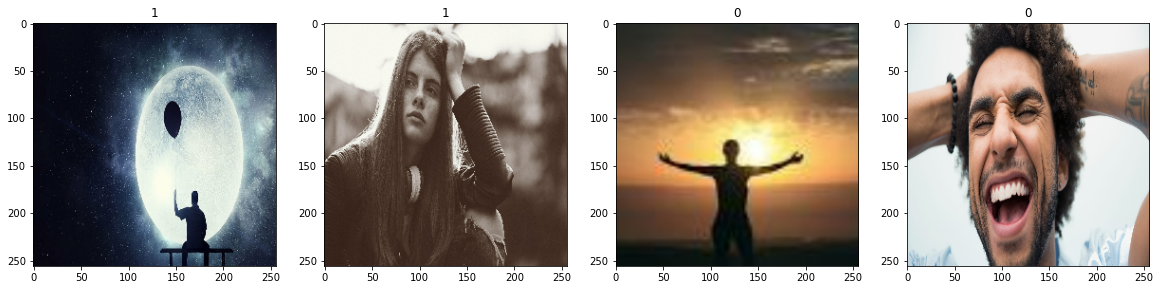

In [18]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.5060279 , 0.568773  , 0.5256357 ],
          [0.51111364, 0.57385874, 0.5307215 ],
          [0.5252068 , 0.5879519 , 0.54481465],
          ...,
          [0.97356004, 0.96151197, 0.96106774],
          [0.9764706 , 0.9607843 , 0.9647059 ],
          [0.9764706 , 0.9607843 , 0.9647059 ]],
 
         [[0.5060279 , 0.568773  , 0.5256357 ],
          [0.5113635 , 0.5741086 , 0.53097135],
          [0.5270346 , 0.5897797 , 0.5466424 ],
          ...,
          [0.97173226, 0.95885134, 0.9588235 ],
          [0.9742264 , 0.95854014, 0.9624617 ],
          [0.9742264 , 0.95854014, 0.9624617 ]],
 
         [[0.50606966, 0.56881475, 0.5256775 ],
          [0.51255083, 0.5752959 , 0.5321587 ],
          [0.5284007 , 0.5911458 , 0.54800856],
          ...,
          [0.9694491 , 0.95594573, 0.9562291 ],
          [0.9714231 , 0.9557368 , 0.9596584 ],
          [0.9714231 , 0.9557368 , 0.9596584 ]],
 
         ...,
 
         [[0.7845881 , 0.6576356 , 0.5818962 ],
          [0.77766

In [21]:
len(data)

10

In [22]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [23]:
test_size

1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(val)

2

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model=Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir='logs'

In [32]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist=model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 2s/step - loss: 1.1021 - accuracy: 0.5268 - val_loss: 0.6555 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6889 - accuracy: 0.4821 - val_loss: 0.6715 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 19s 2s/step - loss: 0.6609 - accuracy: 0.6116 - val_loss: 0.6289 - val_accuracy: 0.5625
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.6496 - accuracy: 0.5759 - val_loss: 0.6391 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.5972 - accuracy: 0.7500 - val_loss: 0.6394 - val_accuracy: 0.5938
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.5455 - accuracy: 0.7679 - val_loss: 0.4544 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.4684 - accuracy: 0.7768 - val_loss: 0.4951 - val_accuracy: 0.7500
Epoch 8/20
7/7 [==================

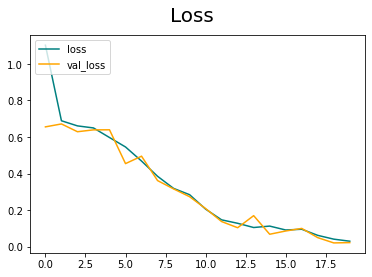

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

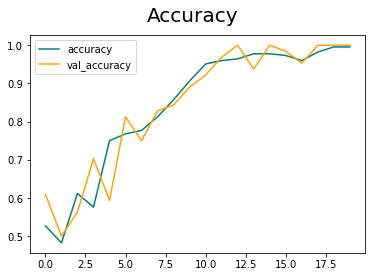

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 530ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


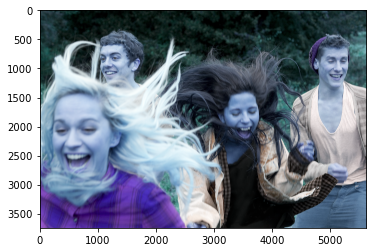

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

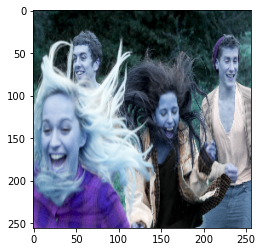

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 85ms/step


In [43]:
yhat

array([[0.0621721]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

In [48]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [49]:
os.path.join('models','imageclassifier.h5')

'models\\imageclassifier.h5'

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 230ms/step


array([[0.0621721]], dtype=float32)